# Multivariate Hawkes Process with Exponential Delay

In this example, we fit multivariate Hawkes (self-exciting) processes (HP). Concretely, a "multivariate" process refers to one which occurrences assume a discrete mark from a finite set. HPs provide one way to model the "mutual excitation" behavior between such occurrences. 

Concretely, we will use a multivariate HP with exponential delays. That is, the process of mark $k \in \{0, 1, \dots, K\}$ will be determined by the conditional intensity function

$$
\lambda^*_k(t) = \mu_k + \sum_{t_i < t} A(c_i, k) \theta \exp(-\theta (t - t_i)),
$$

where $c_i \in \{0, 1, \dots, K\}$.

In the sequel, we first fit parameters $\mu, A, \theta$ to a dataset of currency price jumps. We then sample from a fixed process and explore how well the EM algorithm fits synthetic data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from hawkeslib.model.mv_exp import MultivariateExpHawkesProcess as MVHP

## Example 1: FX Price Jumps

We explore the mutual excitation between price up and down events of several major currency pairs in an interbank exchange.

In [19]:
df = pd.read_csv("example_data.csv", header=None)
df.columns = ["mark", "time"]
df = df.loc[df.mark.isin(range(8)), :]

In [20]:
t = np.array(df.time)
c = np.array(df.mark)

mv = MVHP()
mv.fit(t, c)

-206208.08341292467

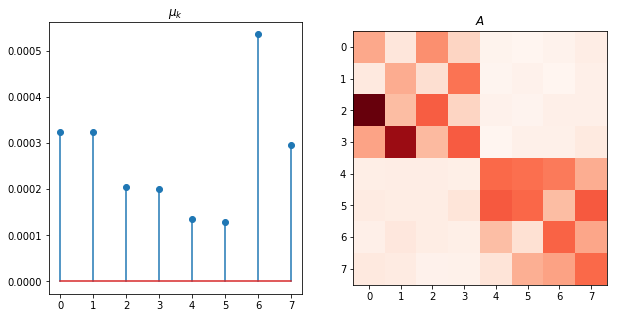

In [29]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].stem(mv._mu)
ax[0].set_title("$\mu_k$")
ax[1].imshow(mv._A, cmap="Reds")
ax[1].set_title("$A$")

## Example 2: Toy Data

In [2]:
K = 4
param_pairs = []
for j in range(10):
#     print j
    mu = np.random.rand(K)
    A = (np.random.rand() * .4 + .1) * np.eye(K) + np.random.rand(K,K) * .1
    theta = .5 + np.random.rand()
    
    hp = MVHP()
    hp.set_params(mu, A, theta)
    t, c = hp.sample(10000)
    
    hp2 = MVHP()
    hp2.fit(t, c, reltol=1e-8)
    
    comb_pars = hp.get_params() + hp2.get_params()
    param_pairs.append(comb_pars)

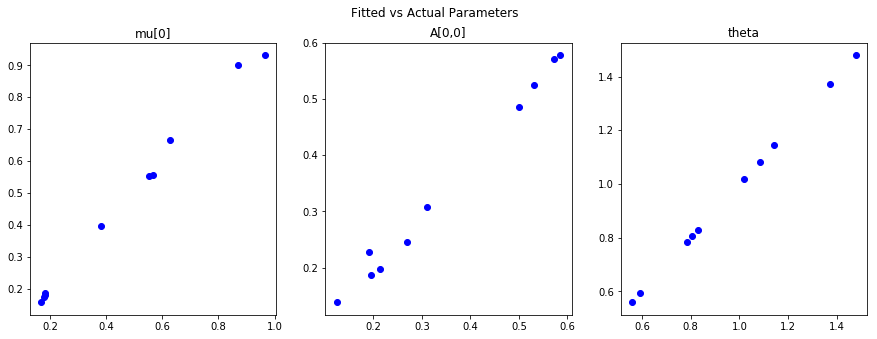

In [4]:
mu0s = np.array([[x[0][0] for x in param_pairs], [x[3][0] for x in param_pairs]])
A00s = np.array([[x[1][0,0] for x in param_pairs], [x[4][0,0] for x in param_pairs]])
ths = np.array([[x[2] for x in param_pairs], [x[2] for x in param_pairs]])

f, ax = plt.subplots(1, 3, figsize=(15,5))
f.suptitle("Fitted vs Actual Parameters")

ax[0].plot(mu0s[0, :], mu0s[1, :], "bo")
ax[0].set_title("mu[0]")
ax[1].plot(A00s[0, :], A00s[1, :], "bo")
ax[1].set_title("A[0,0]")
ax[2].plot(ths[0, :], ths[1, :], "bo")
ax[2].set_title("theta")